This notebook was used to collect data (apart from what we already had) which we used to infer labels using Vader
We already have a dataset to begin with but the accuracy wasn't right, even after trying sampling, and many other things, and in order to make sure that we weren't overfitting to the data, we decided to not only use an available dataset, but mine new data from the Reddit API for python for training.

In [135]:
from IPython import display
import math

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#pprint means pretty print JSON and lists

from pprint import pprint 

import nltk
sns.set(style='darkgrid', context='talk', palette='Dark2')

#importing libraries
%pip install praw
nltk.download('vader_lexicon')

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\apexv\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [136]:
# Getting reddit posts in real time
import praw
reddit = praw.Reddit(client_id='VhHLXNXzOOr04Hllj6-MFg',
                     client_secret='yieYBSgU3k3H4Al_Ww7AoV39qapvFA',
                     user_agent='reveal')
headlines = list()
# List of subreddits
subreddits = ['Politics', 'mildlyinteresting','india','news','nottheonion','comics','Damnthatsinteresting','OneOrangeBraincell','pics','antiwork']

# Loop through each subreddit
for subreddit in subreddits:
    for submission in reddit.subreddit(subreddit).top(limit=2000):
        headlines.append(submission.title)
    display.clear_output()
    print(len(headlines))

9916


In [137]:
headlines.sort()
# headlines

In [138]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3])

[{'compound': 0.0,
  'headline': ' Asimov found the braincell! ',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0516,
  'headline': ' “The Smiling Disaster Girl” Zoë Roth sold her original photo '
              'for nearly $500,000 as a non-fungible token (NFT) at an auction '
              'in 2021',
  'neg': 0.144,
  'neu': 0.669,
  'pos': 0.187},
 {'compound': 0.0,
  'headline': '" Hold my toof ma\'! "',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [139]:
df = pd.DataFrame.from_records(results)

In [140]:
# compound show the sentiment value (-1(extremely negative) to +1(extremly positive))
df.head(50)

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,Asimov found the braincell!
1,0.144,0.669,0.187,0.0516,“The Smiling Disaster Girl” Zoë Roth sold her...
2,0.000,1.000,0.000,0.0000,""" Hold my toof ma'! """
3,0.000,1.000,0.000,0.0000,"""40 hours a week is part time"""
4,0.000,1.000,0.000,0.0000,"""5 chips"" in ₹10 lays"
5,0.518,0.482,0.000,-0.6486,"""A country of dead people"""
6,0.512,0.488,0.000,-0.4939,"""BEHOLD THE GRAVES OF MY ADVERSARIES"""
7,0.000,0.000,1.000,0.8074,"""Best friends"""
8,0.290,0.710,0.000,-0.7997,"""CM's claims are hollow. Ashamed to be a BJP w..."
9,0.000,1.000,0.000,0.0000,"""Carry me to my room, I'm too drugged to walk."""


Here, we use the compound attribute from Vader to approximate the sentiment of each sentence.

In [141]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2 , 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,Asimov found the braincell!,0
1,0.144,0.669,0.187,0.0516,“The Smiling Disaster Girl” Zoë Roth sold her...,0
2,0.000,1.000,0.000,0.0000,""" Hold my toof ma'! """,0
3,0.000,1.000,0.000,0.0000,"""40 hours a week is part time""",0
4,0.000,1.000,0.000,0.0000,"""5 chips"" in ₹10 lays",0


In [142]:
%pip install pyarrow
%pip install fastparquet
df2 = df[['headline','label']]
df2.to_csv('New_Data', mode='a' ,encoding = 'utf-8', index=False)
df2.to_parquet('NewData.parquet')

DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330



Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


# Exploratory Data Analysis

In [143]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:20], width=200)

print("\nNeutral headlines:\n")
pprint(list(df[df['label'] == 0].headline)[:20], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:20], width=200)

Positive headlines:

['"Best friends"',
 '"Disturbing" memo reveals Trump\'s USPS chief has slowed delivery amid calls to expand voting by mail',
 '"Do something you love, and you\'ll never work a day in your life"',
 '"Elders Must Be Respected In Group"',
 '"Higher than acceptable" methamphetamine levels in air ducts close Colorado public library',
 '"I love the braincell! I like to wave at it as it flies by."',
 '"Impeach Justice Clarence Thomas" petition passes 230K signatures',
 '"Just before I put my camera away, I saw this orangutan take a taro leaf and put it on top on his head to protect himself from the rain," writes Your Shot photographer Andrew Suryono. On World '
 'Orangutan Day',
 '"Meri pagadi Khalistani aur aapki topi pakistani" both of them laughed. This is one of the most beautiful picture (swipe)',
 '"Treachery"—Donald Trump faces backlash for asking Vladimir Putin a favor',
 '"entitled young generation" she\'s the entitled one',
 '#FireTrumpNotFauci Trends After Pres

In [144]:
print(df.label.value_counts())
print(df.label.value_counts(normalize=True)*100) #shows percentage

label
 0    4891
-1    2687
 1    2338
Name: count, dtype: int64
label
 0    49.324324
-1    27.097620
 1    23.578056
Name: proportion, dtype: float64


C:\Users\apexv\AppData\Local\Temp\ipykernel_12364\855615252.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Negative','Neutral','Positive'])


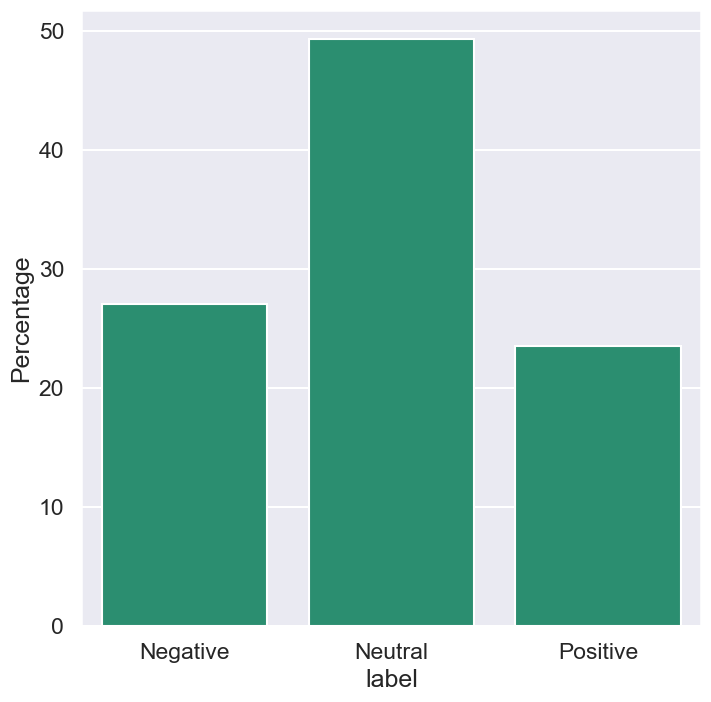

In [145]:
fig,ax = plt.subplots(figsize=(8,8));

counts = df.label.value_counts(normalize=True)*100

sns.barplot(x=counts.index, y=counts, ax=ax);
ax.set_ylabel('Percentage');
ax.set_xticklabels(['Negative','Neutral','Positive'])
plt.show()


# Data Preprocess

In [146]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize,RegexpTokenizer
example = "This is a good example for how RegexpTokenizer Wow"

print(word_tokenize(example, language='english'))

tokenizer = RegexpTokenizer(r'\w+') #does not contain punctuation only consider workds
tokenizer.tokenize(example)

['This', 'is', 'a', 'good', 'example', 'for', 'how', 'RegexpTokenizer', 'Wow']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\apexv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['This', 'is', 'a', 'good', 'example', 'for', 'how', 'RegexpTokenizer', 'Wow']

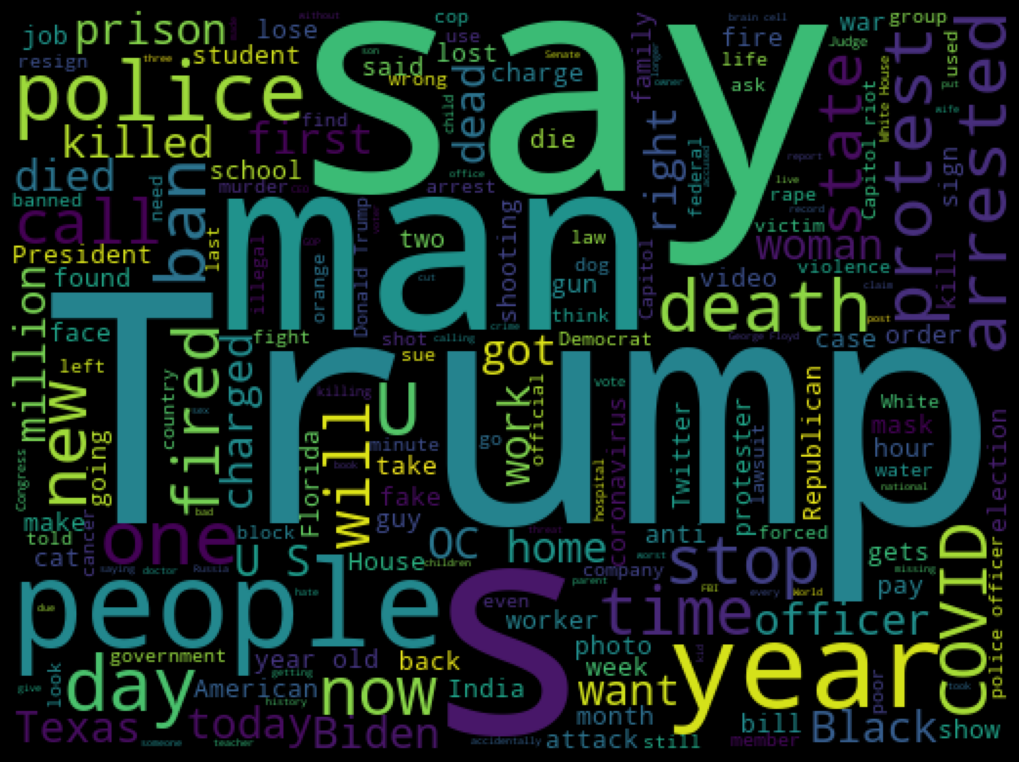

In [147]:
from wordcloud import WordCloud
bully_words = ' '.join(list(df[df['label'] == -1]['headline']))
bully_wc = WordCloud(width = 512,height = 380).generate(bully_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(bully_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

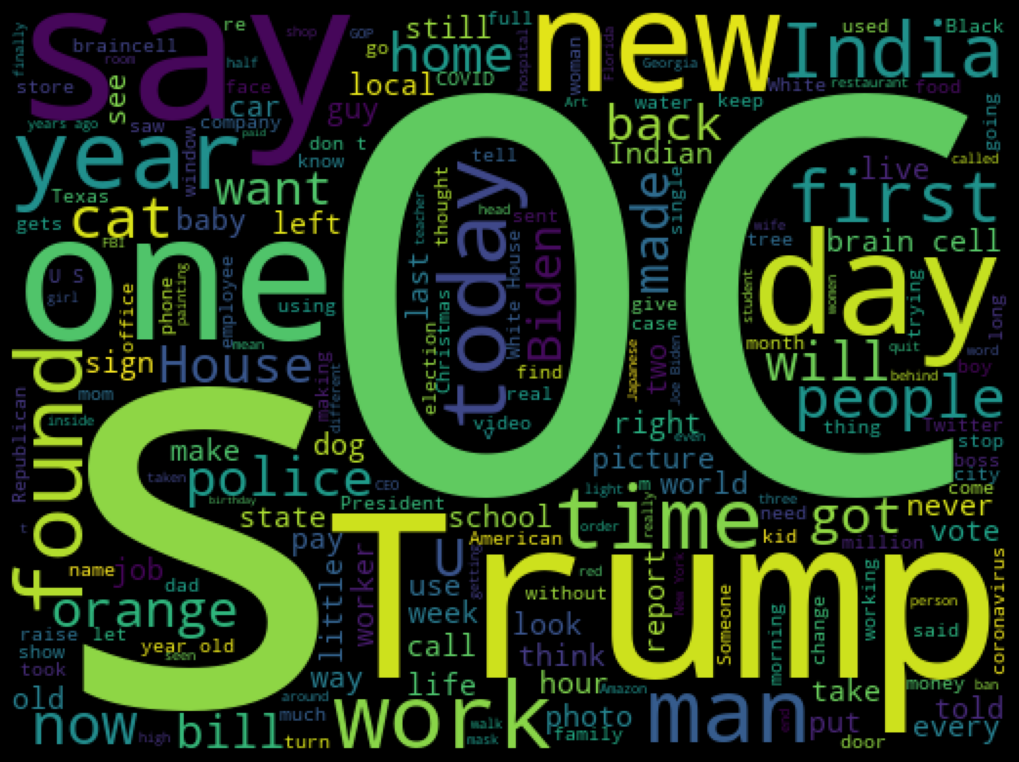

In [148]:
from wordcloud import WordCloud
non_bully_words = ' '.join(list(df[df['label'] == 0]['headline']))
non_bully_wc = WordCloud(width = 512,height = 380).generate(non_bully_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(non_bully_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [149]:
#removing stopwords like ’the, ’is’, ’and’, ’what’, etc. that are irrelevant to sentiment and dont provide any valuable information
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\apexv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [150]:
# Word Distribution
def process_text(headlines):
    tokens = []
    for line in headlines:
        token = tokenizer.tokenize(line)
        token = [t.lower() for t in token if t.lower() not in stop_words]
        tokens.extend(token)
    return tokens

In [151]:
pos_lines = list(df[df.label == 0].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('trump', 193),
 ('oc', 174),
 ('new', 134),
 ('one', 130),
 ('says', 126),
 ('years', 123),
 ('today', 113),
 ('time', 105),
 ('man', 105),
 ('found', 101),
 ('day', 98),
 ('old', 95),
 ('first', 95),
 ('work', 91),
 ('house', 90),
 ('orange', 87),
 ('year', 85),
 ('people', 82),
 ('india', 82),
 ('police', 81)]

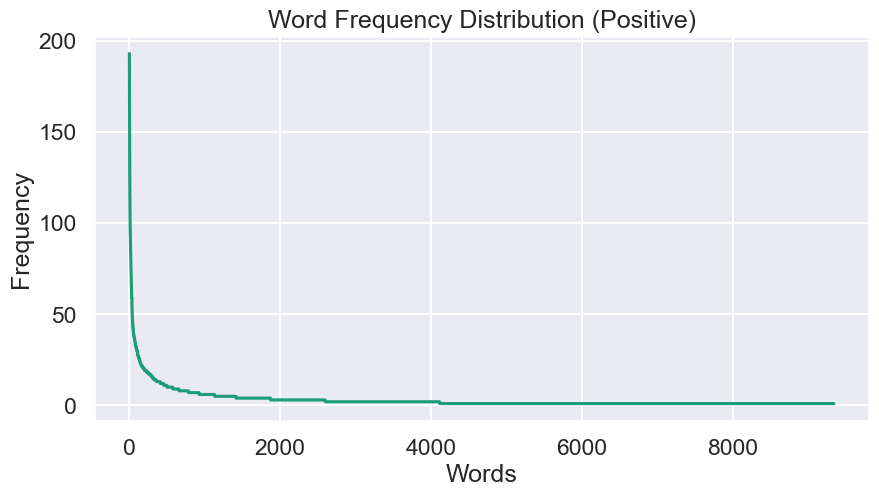

In [152]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

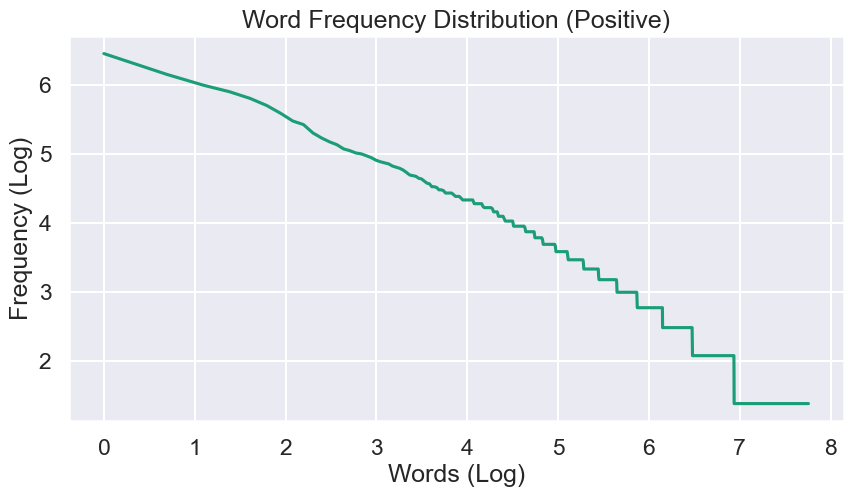

In [153]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [154]:
# negative words
neg_lines = list(df2[df2.label == 0].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('trump', 193),
 ('oc', 174),
 ('new', 134),
 ('one', 130),
 ('says', 126),
 ('years', 123),
 ('today', 113),
 ('time', 105),
 ('man', 105),
 ('found', 101),
 ('day', 98),
 ('old', 95),
 ('first', 95),
 ('work', 91),
 ('house', 90),
 ('orange', 87),
 ('year', 85),
 ('people', 82),
 ('india', 82),
 ('police', 81)]

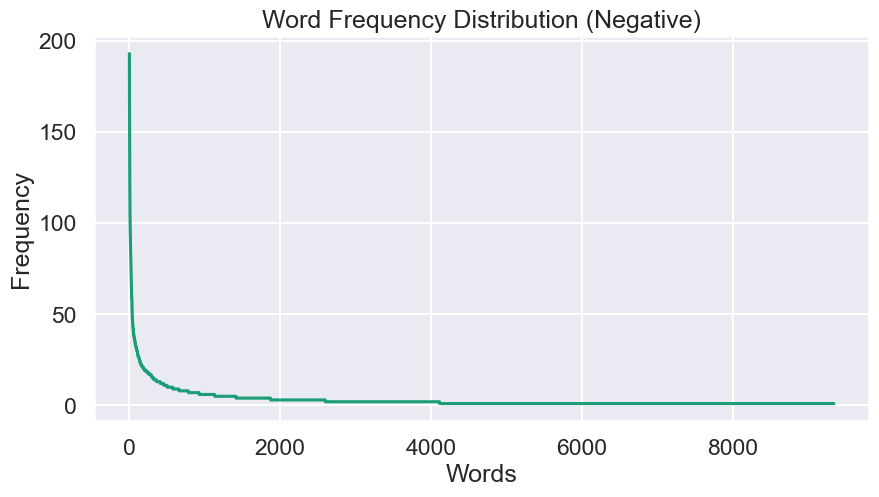

In [155]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

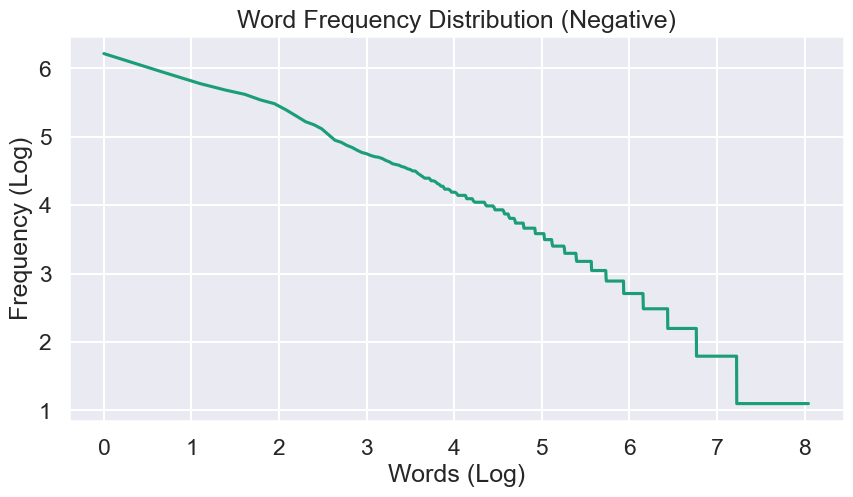

In [156]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()

In [157]:
#Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'headline' is the text column, 'label' is the target
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', min_df=3, max_df=0.7, ngram_range=(1, 3))
X = vectorizer.fit_transform(df['headline'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [158]:
#Training and Hyperparameter tuning
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Hyperparameter tuning for Logistic Regression
param_grid_lr = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'saga'], 'penalty': ['l1', 'l2']}
grid_lr = GridSearchCV(LogisticRegression(max_iter=5000), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)
print(f"Best parameters for Logistic Regression: {grid_lr.best_params_}")
lr_classifier = grid_lr.best_estimator_

# Hyperparameter tuning for SVC
param_grid_svc = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
grid_svc = GridSearchCV(SVC(), param_grid_svc, cv=5, scoring='accuracy')
grid_svc.fit(X_train, y_train)
print(f"Best parameters for SVC: {grid_svc.best_params_}")
svc_classifier = grid_svc.best_estimator_

# Naive Bayes does not typically require hyperparameter tuning beyond the alpha parameter
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)


Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


MultinomialNB()

In [159]:
from sklearn.metrics import classification_report
#Evaluation
def evaluate_model(model, X_test, y_test, model_name):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, predictions))

# Evaluate each model
evaluate_model(nb_classifier, X_test, y_test, "Naive Bayes")
evaluate_model(lr_classifier, X_test, y_test, "Logistic Regression")
evaluate_model(svc_classifier, X_test, y_test, "SVC")


Naive Bayes Accuracy: 0.66
              precision    recall  f1-score   support

          -1       0.75      0.48      0.58       530
           0       0.62      0.90      0.74       985
           1       0.77      0.36      0.50       469

    accuracy                           0.66      1984
   macro avg       0.71      0.58      0.60      1984
weighted avg       0.69      0.66      0.64      1984

Logistic Regression Accuracy: 0.73
              precision    recall  f1-score   support

          -1       0.73      0.64      0.68       530
           0       0.73      0.81      0.77       985
           1       0.71      0.65      0.68       469

    accuracy                           0.73      1984
   macro avg       0.72      0.70      0.71      1984
weighted avg       0.72      0.73      0.72      1984

SVC Accuracy: 0.72
              precision    recall  f1-score   support

          -1       0.78      0.54      0.64       530
           0       0.68      0.90      0.78     